📖 참고 : 이것이 데이터 분석이다 with 파이썬

# 프로야구 선수의 다음 해 연봉 예측하기

## 1. 라이브러리 호출 및 데이터 읽기

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
picher_file_path = '../data/picher_stats_2017.csv'
batter_file_path = '../data/batter_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)

- 데이터의 열이름 출력하기

In [3]:
picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [4]:
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


- 데이터의 크기 출력하기

In [5]:
picher.shape

(152, 22)

- 한글 폰트

In [6]:
import matplotlib as mpl
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist])) # 현재 OS 내에 설치된 폰트를 확인

{'12LotteMartDreamBold',
 '12LotteMartDreamLight',
 '12LotteMartDreamMedium',
 '12LotteMartHLight',
 '12LotteMartHappyBold',
 '12LotteMartHappyMedium',
 'Adobe Arabic',
 'Adobe Caslon Pro',
 'Adobe Devanagari',
 'Adobe Fan Heiti Std',
 'Adobe Fangsong Std',
 'Adobe Garamond Pro',
 'Adobe Gothic Std',
 'Adobe Hebrew',
 'Adobe Heiti Std',
 'Adobe Kaiti Std',
 'Adobe Ming Std',
 'Adobe Myungjo Std',
 'Adobe Naskh',
 'Adobe Song Std',
 'Agency FB',
 'Algerian',
 'Ami R',
 'AndongKaturi',
 'AndongKaturiOTF',
 'AndongWolyeonggyo',
 'AndongWolyeonggyoOTF',
 'Arial',
 'Arial Rounded MT Bold',
 'BC card',
 'BM JUA_TTF',
 'BR B',
 'BR R',
 'Bahnschrift',
 'Baskerville Old Face',
 'Batang',
 'Bauhaus 93',
 'Bell MT',
 'Berlin Sans FB',
 'Berlin Sans FB Demi',
 'Bernard MT Condensed',
 'Binggrae',
 'Birch Std',
 'Blackadder ITC',
 'Blackoak Std',
 'Bodoni MT',
 'Book Antiqua',
 'Bookman Old Style',
 'Bookshelf Symbol 7',
 'Bradley Hand ITC',
 'Britannic Bold',
 'Broadway',
 'Brush Script MT',
 'Br

In [7]:
plt.rcParams["font.family"] = "New Gulim"

## 2. EDA 및 전처리

- 연봉(2018)에 대한 정보 알아보기

In [8]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

<AxesSubplot:>

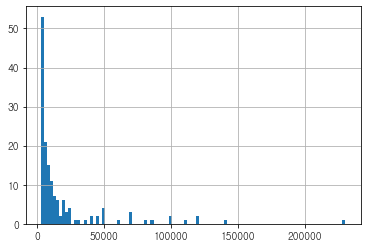

In [9]:
picher['연봉(2018)'].hist(bins=100)

<AxesSubplot:>

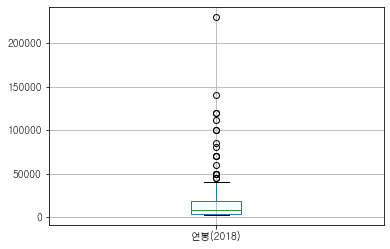

In [10]:
picher.boxplot(column = ['연봉(2018)'])

- 피처 살펴보기

In [11]:
picher_features_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']]

In [12]:
def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    
    # df의 column 갯수 만큼의 subplot을 출력합니다.
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()

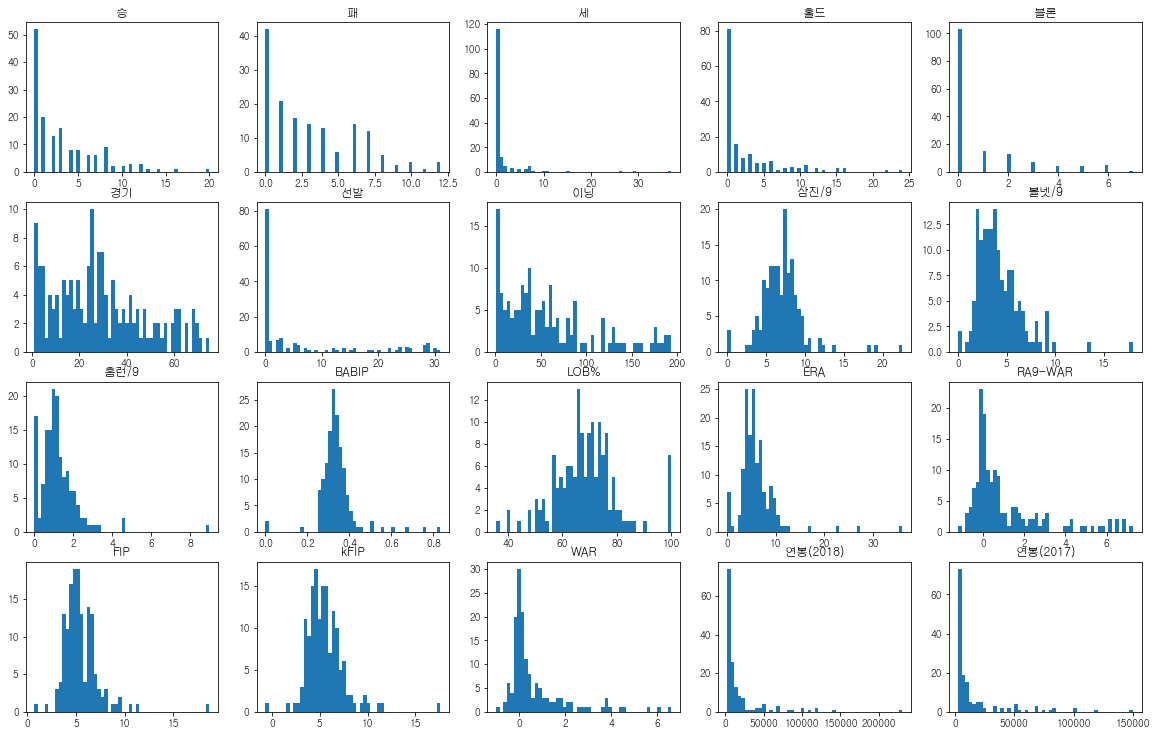

In [13]:
plot_hist_each_column(picher_features_df)

### 표준화

In [14]:
def standard_scaling(df, scale_columns):
    for col in scale_columns :
        mean = df[col].mean()
        std = df[col].std()
        df[col] = df[col].apply(lambda x : (x-mean) / std)
    return df

In [15]:
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']
picher_df = standard_scaling(picher, scale_columns)

- 연봉(2018)의 이름을 y로 변경

In [16]:
picher_df = picher_df.rename(columns={'연봉(2018)': 'y'})
picher_df.head(5)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


### One-hot-encoding

In [17]:
team_encoding = pd.get_dummies(picher_df['팀명']) # one-hot-encoding
picher_df = picher_df.drop('팀명', axis=1) # 팀명 드랍하기


In [18]:
picher_df = picher_df.join(team_encoding)# team_encoding 한 것 합치기

In [19]:
team_encoding.head(5)

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0


In [20]:
picher_df.head()

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,...,2.734705,0,0,0,0,1,0,0,0,0
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,...,1.337303,0,0,1,0,0,0,0,0,0
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,...,5.329881,1,0,0,0,0,0,0,0,0
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,...,3.333592,0,0,1,0,0,0,0,0,0
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,...,2.734705,0,0,0,0,0,0,1,0,0


## 3. 데이터셋 구성

In [21]:
from sklearn.model_selection import train_test_split
X = picher_df[picher_df.columns.difference(['선수명','y'])]
y = picher_df['y']

# 학습 데이터(모델을 만들 떄)와 테스트 데이터(테스트할떄)로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 43)

In [22]:
len(X_train)

121

In [23]:
len(X_test)

31

## 4. 모델링 및 예측

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train) #학습 데이터 학습

LinearRegression()

In [26]:
print(lr.coef_)

[-1.09855330e+03 -5.09678348e+00 -8.16271871e+04 -2.20501629e+02
  2.10492367e+03 -8.37969992e+02 -9.35194386e+02 -1.04310322e+03
  6.55544530e+03 -1.43838114e+03  1.58498718e+03  7.00291613e+04
 -3.99381629e+03 -1.43782029e+03  3.76466577e+03  5.38551306e+03
  8.39134696e+02 -3.45788536e+03  5.85372211e+03 -7.20354693e+03
  1.96082067e+03 -2.10069853e+03  1.93353383e+04  8.41281771e+03
  9.72806237e+02  2.56607219e+03  4.07250861e+02  1.33029456e+04]


In [27]:
picher_df.columns

Index(['선수명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9',
       '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', 'y',
       '연봉(2017)', 'KIA', 'KT', 'LG', 'NC', 'SK', '두산', '롯데', '삼성', '한화'],
      dtype='object')

In [28]:
print(lr.score(X_train, y_train)) # train R2 score를 출력
print(lr.score(X_test, y_test)) # test R2 score를 출력

0.938877256124541
0.8116601343937249


## 5. 평가

In [29]:
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력

5670.190361855477
21576.85911640698


## 6. 영향력이 강한 피처 살펴보기

- 결정계수(R-squared), 수정된 결정계수(Adj.R-squared) : 회귀 분석이 얼마나 잘 되었는지 평가하는 지표, 추정한 선형 모형이 주어진 자료에 적합한 정도를 재는 척도, 1에 가까울수록 데이터를 잘 설명하는 모델
- F 통계량(F-statistic) :  회귀식의 유의성 검정에 사용되는 값
- P>|t| : 각 피처의 검정 통계량이 얼마나 유의미한지에 대한 p-value를 나타내는 값

In [30]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()
#R-squared Adg.R-squ.. F-statistic... 참고하여 유의한지 확인

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     52.91
Date:                Fri, 28 May 2021   Prob (F-statistic):           3.61e-45
Time:                        10:04:22   Log-Likelihood:                -1217.5
No. Observations:                 121   AIC:                             2491.
Df Residuals:                      93   BIC:                             2569.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.617e+04    567.425     28.498      0.000     1.5e+04    1.73e+04
BABIP      -1098.5533   1024.495     -1.072      0.286   -3132.996     935.890
ERA           -5.0968   1909.211     -0.003      0.998   -3796.412    3786.219
FIP        -8.163e+04   6.83e+04     -1.196      0.235   -2.17e+05    5.39e+04
KIA         1576.2074   1846.598      0.854      0.396   -2090.771    5243.186
KT          3901.6327   1731.024      2.254      0.027     464.162    7339.103
LG           958.7391   1660.222      0.577      0.565   -2338.134    4255.612
LOB%        -935.1944   1301.741     -0.718      0.474   -3520.194    1649.806
NC           753.6058   2070.878      0.364      0.717   -3358.748    4865.960
RA9-WAR     6555.4453   2204.813      2.973      0.004    2177.123    1.09e+04
SK           358.3279   1737.004      0.206      0.837   -3091.018    3807.674
WAR         1584.9872   2178.962      0.727      0.469   -2741.999    5911.974
kFIP        7.003e+04   5.85e+04      1.198      0.234   -4.61e+04    1.86e+05
경기         -3993.8163   2304.438     -1.733      0.086   -8569.974     582.341
두산           358.8888   2149.388      0.167      0.868   -3909.369    4627.146
롯데          5561.3748   2024.764      2.747      0.007    1540.594    9582.156
볼넷/9        5385.5131   4205.948      1.280      0.204   -2966.666    1.37e+04
블론           839.1347   1013.317      0.828      0.410   -1173.112    2851.382
삼성         -1661.1763   1953.968     -0.850      0.397   -5541.370    2219.017
삼진/9        5853.7221   5736.842      1.020      0.310   -5538.509    1.72e+04
선발         -7203.5469   3616.396     -1.992      0.049   -1.44e+04     -22.101
세           1960.8207   1466.299      1.337      0.184    -950.959    4872.600
승          -2100.6985   1847.253     -1.137      0.258   -5768.977    1567.580
연봉(2017)    1.934e+04    991.138     19.508      0.000    1.74e+04    2.13e+04
이닝          8412.8177   4724.901      1.781      0.078    -969.900    1.78e+04
패            972.8062   1460.042      0.666      0.507   -1926.549    3872.161
한화          4362.7812   1643.161      2.655      0.009    1099.788    7625.774
홀드           407.2509   1156.377      0.352      0.726   -1889.085    2703.587
홈런/9         1.33e+04   1.15e+04      1.153      0.252   -9614.148    3.62e+04
==============================================================================
Omnibus:                       47.799   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1053.692
Skew:                          -0.591   Prob(JB):                    1.56e-229
Kurtosis:                      17.408   Cond. No.                     2.99e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

[Text(0, 0, 'const'),
 Text(1, 0, 'BABIP'),
 Text(2, 0, 'ERA'),
 Text(3, 0, 'FIP'),
 Text(4, 0, 'KIA'),
 Text(5, 0, 'KT'),
 Text(6, 0, 'LG'),
 Text(7, 0, 'LOB%'),
 Text(8, 0, 'NC'),
 Text(9, 0, 'RA9-WAR'),
 Text(10, 0, 'SK'),
 Text(11, 0, 'WAR'),
 Text(12, 0, 'kFIP'),
 Text(13, 0, '경기'),
 Text(14, 0, '두산'),
 Text(15, 0, '롯데'),
 Text(16, 0, '볼넷/9'),
 Text(17, 0, '블론'),
 Text(18, 0, '삼성'),
 Text(19, 0, '삼진/9'),
 Text(20, 0, '선발'),
 Text(21, 0, '세'),
 Text(22, 0, '승'),
 Text(23, 0, '연봉(2017)'),
 Text(24, 0, '이닝'),
 Text(25, 0, '패'),
 Text(26, 0, '한화'),
 Text(27, 0, '홀드'),
 Text(28, 0, '홈런/9')]

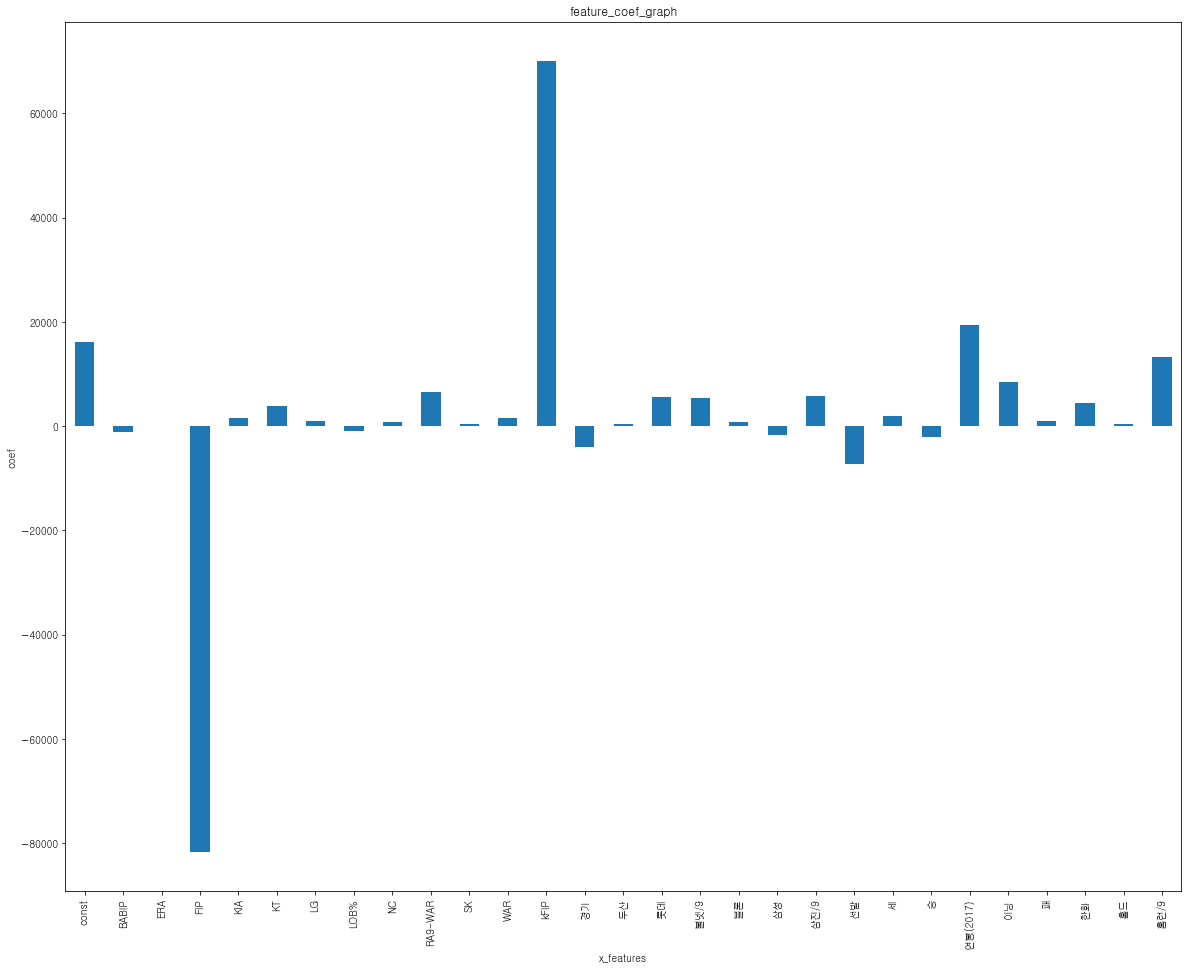

In [31]:
plt.rcParams['figure.figsize'] = [20, 16]

# 회귀 계수를 리스트로 반환
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

# 변수명을 리스트로 반환
x_labels = model.params.index.tolist()

# 회귀 계수를 출력
ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

## 7. 적절한 피처로 다시 학습하기

### 상관관계

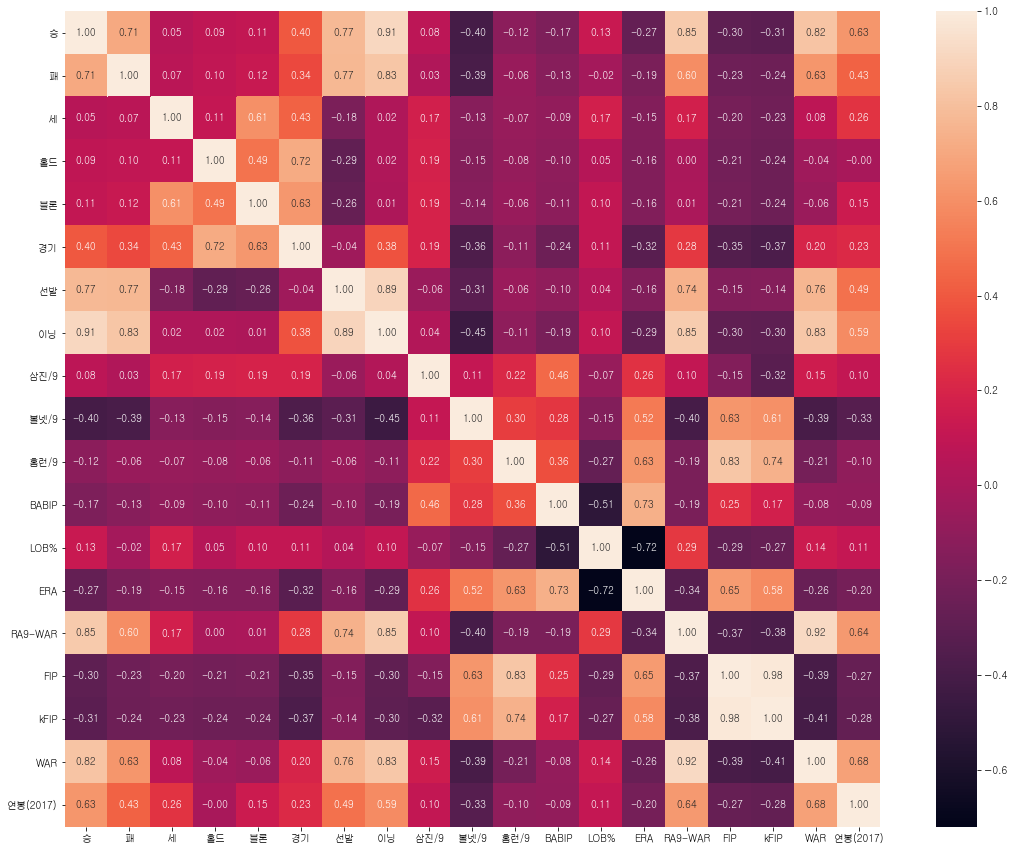

In [32]:
import seaborn as sns

plt.figure(figsize=(20,15))
sns.heatmap(picher_df[scale_columns].corr(), annot=True, fmt='.2f', square=True)
plt.show()

### 다중공선성
- 독립변수들 간에 강한 상관관계가 나타나는 문제
- 일반적으로 VIF가 10 이상이면 다중공선성이 있다고 봄

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
vif = pd.DataFrame()

# 몇번째 독립변수 ~의 VIF 계산
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)
#10이 넘으면 안좋음. 다중공선성이 높음

,VIF Factor,features
0,3.2,BABIP
1,10.6,ERA
2,14238.3,FIP
3,1.1,KIA
4,1.1,KT
5,1.1,LG
6,4.3,LOB%
7,1.1,NC
8,13.6,RA9-WAR
9,1.1,SK


### 피처 선택 및 모델링, 평가

In [35]:
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [36]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9150591192570362
0.9038759653889864


In [38]:
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions)))
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

7893.462873347693
13141.866063591087


In [39]:
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,1.9,FIP
1,2.1,WAR
2,1.9,볼넷/9
3,1.1,삼진/9
4,1.9,연봉(2017)


## 8. 분석 결과 시각화

In [40]:
# 2018년 연봉을 예측하여 데이터프레임의 column으로 생성
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
predict_2018_salary = lr.predict(X)
picher_df['예측연봉(2018)'] = pd.Series(predict_2018_salary)

# 원래의 데이터 프레임을 다시 로드
picher = pd.read_csv(picher_file_path)
picher = picher[['선수명', '연봉(2017)']]

# 원래의 데이터 프레임에 2018년 연봉 정보를 합침
result_df = picher_df.sort_values(by=['y'], ascending=False)
result_df.drop(['연봉(2017)'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(picher, on=['선수명'], how='left')
result_df = result_df[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]
result_df.columns = ['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']

# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰
result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]
result_df = result_df.reset_index() #초기화
result_df = result_df.iloc[:10, :] #상위10개만
result_df.head(10)

,index,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,0,양현종,230000,163930.148696,150000
1,1,켈리,140000,120122.822204,85000
2,2,소사,120000,88127.019455,50000
3,4,레일리,111000,102253.697589,85000
4,7,피어밴드,85000,58975.725734,35000
5,13,배영수,50000,56873.662417,55000
6,21,안영명,35000,22420.790838,20000
7,22,채병용,30000,21178.955105,25000
8,23,류제국,29000,45122.360087,35000
9,24,박정진,25000,29060.748299,33000


<AxesSubplot:xlabel='선수명'>

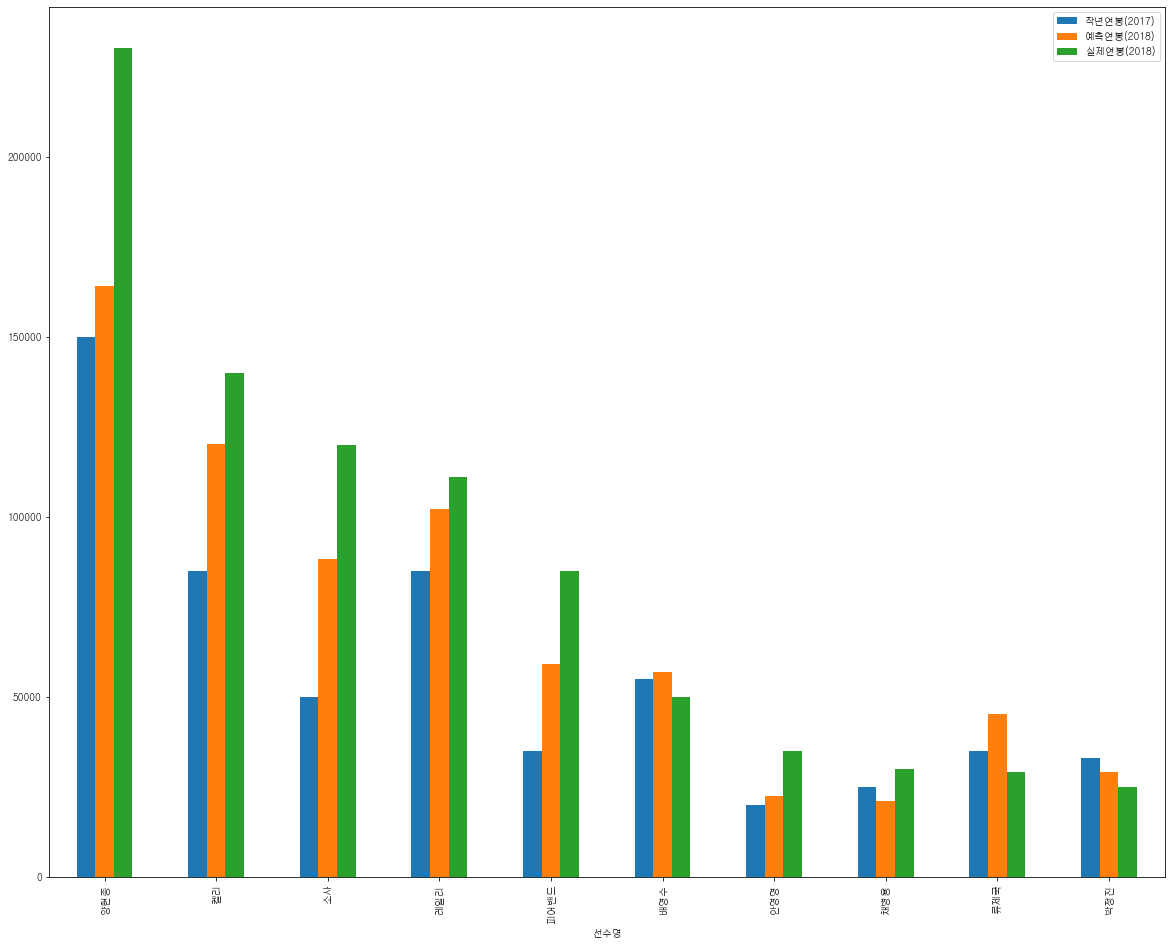

In [41]:
result_df.plot(x='선수명', y=['작년연봉(2017)', '예측연봉(2018)', '실제연봉(2018)'], kind="bar")